Dataset Description:

Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.

In [23]:
#Importing all necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
#train dataset
train=pd.read_csv('train_malignant.csv') #Creating the dataframe 
train.head()  #Checking the first 5 rows of the dataset

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [25]:
#test dataset
test=pd.read_csv('test_malignant.csv') #Creating the dataframe
test.head() #Checking the first 5 rows of the test dataset

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [26]:
print('train shape is ',train.shape) #shape of the train dataset
print('test shape is ',test.shape) #shape of the test dataset

train shape is  (159571, 8)
test shape is  (153164, 2)


In [27]:
print('train info',train.info) #information of the train dataset

train info <bound method DataFrame.info of                       id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        

In [28]:
print('test info',test.info) #information of the test dataset

test info <bound method DataFrame.info of                       id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[153164 rows x 2 columns]>


In [29]:
#Statistical summary of the train dataset
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
#Statistical summary of the test dataset
test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,950b8e090f2cd295,== Thought you quit == \n\n I thought you quit...
freq,1,1


id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


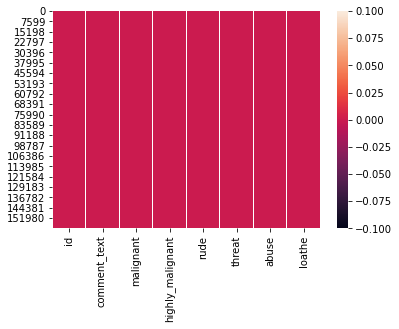

In [31]:
# Checking null values if any
print(train.isnull().sum())
print(sns.heatmap(train.isnull()))

No null values are present in the train dataset.

In [32]:
#Checking correlation in the train dataset
train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


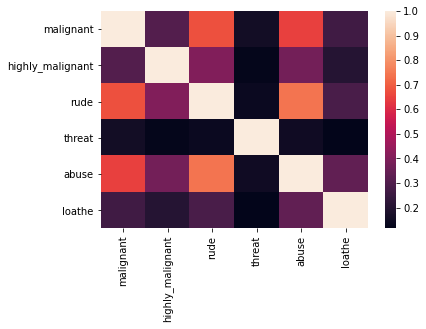

In [33]:
sns.heatmap(train.corr()) #Checking correlation using heatmap

In [34]:
#Checking the skewness for the features:
train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

The above columns are categorical in nature,so we dont need to remove skewness.

malignant


0    144277
1     15294
Name: malignant, dtype: int64


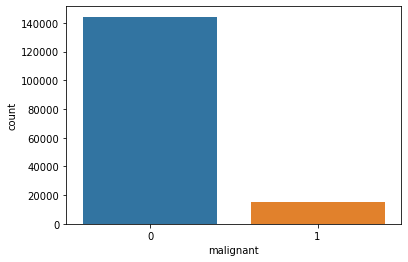

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


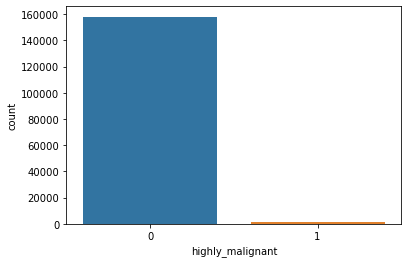

rude


0    151122
1      8449
Name: rude, dtype: int64


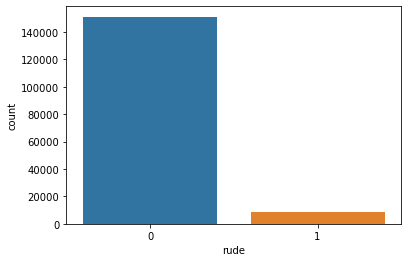

threat


0    159093
1       478
Name: threat, dtype: int64


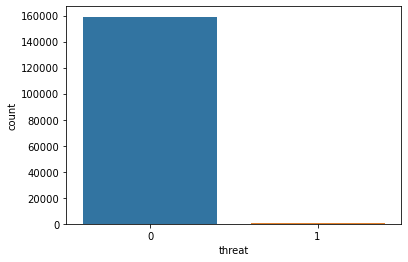

abuse


0    151694
1      7877
Name: abuse, dtype: int64


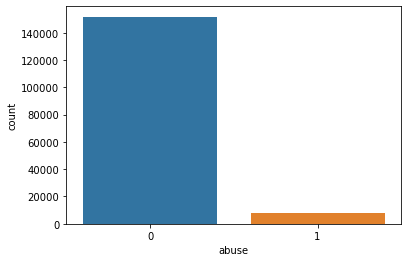

loathe


0    158166
1      1405
Name: loathe, dtype: int64


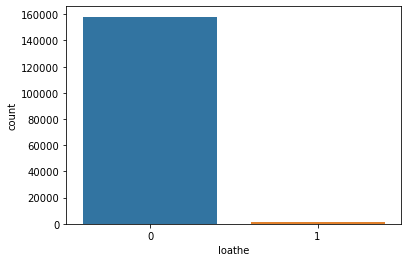

In [35]:
col=['malignant','highly_malignant','rude','threat','abuse','loathe']
for i in col:
    print(i)
    print("\n")
    print(train[i].value_counts())
    sns.countplot(train[i])
    plt.show()

In [36]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [37]:
train['length'] = train['comment_text'].str.len()
train.head(4)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622


In [38]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Neeti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
# Convert all messages to lower case
train['comment_text'] = train['comment_text'].str.lower()

# Replace email addresses with 'email'
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

# Replace numbers with 'numbr'
train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?','numbr')


train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

    

In [40]:
train['clean_length'] = train.comment_text.str.len()
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


In [41]:
#Total length removal
print ('Origin Length', train.length.sum())
print ('Clean Length', train.clean_length.sum())

Origin Length 62893130
Clean Length 43575187


In [43]:
!pip3 install wordcloud

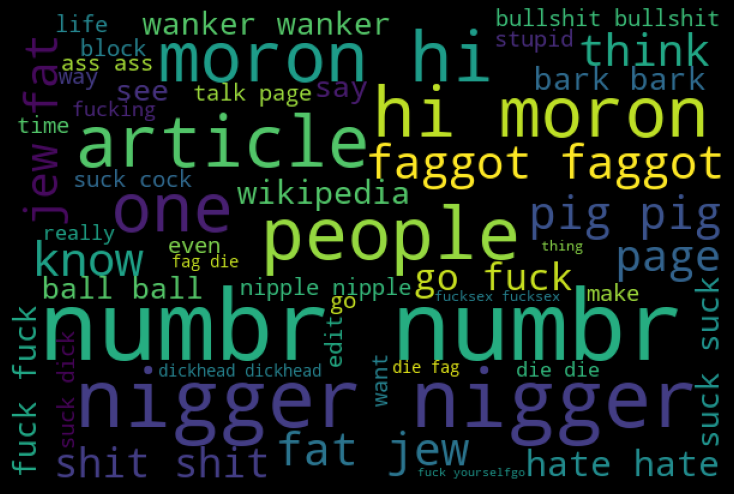

In [44]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = train['comment_text'][train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [45]:
#Importing necessary libraries and the algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

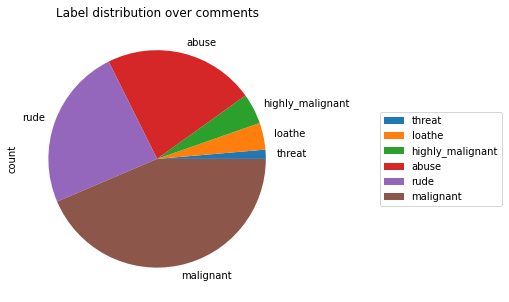

In [46]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                         title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))  #Creating the pie plot

In [47]:
target_data = train[cols_target]
train['bad'] =train[cols_target].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


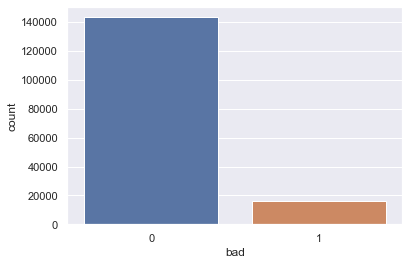

In [48]:
sns.set()
sns.countplot(x="bad" , data = train)
plt.show()

In [49]:
#Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x = features

In [50]:
train.shape 

(159571, 11)

In [51]:
test.shape

(153164, 2)

In [52]:
y=train['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [53]:
y_train.shape,y_test.shape

((111699,), (47872,))

In [54]:
#LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)
LG.fit(x_train, y_train)
y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9595520103134316
Test accuracy is 0.9553183489304813
[[42729   221]
 [ 1918  3004]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



In [55]:
#DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988898736783678
Test accuracy is 0.938983121657754
[[41574  1376]
 [ 1545  3377]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     42950
           1       0.71      0.69      0.70      4922

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872



In [56]:
#RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988540631518635
Test accuracy is 0.9550885695187166
[[42393   557]
 [ 1593  3329]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.68      0.76      4922

    accuracy                           0.96     47872
   macro avg       0.91      0.83      0.87     47872
weighted avg       0.95      0.96      0.95     47872



In [58]:
#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.951118631321677
Test accuracy is 0.9490307486631016
[[42553   397]
 [ 2043  2879]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42950
           1       0.88      0.58      0.70      4922

    accuracy                           0.95     47872
   macro avg       0.92      0.79      0.84     47872
weighted avg       0.95      0.95      0.94     47872



In [59]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.922300110117369
Test accuracy is 0.9173629679144385
[[42809   141]
 [ 3815  1107]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42950
           1       0.89      0.22      0.36      4922

    accuracy                           0.92     47872
   macro avg       0.90      0.61      0.66     47872
weighted avg       0.91      0.92      0.89     47872



In [61]:
#RandomForestClassifier
#This classifier is giving the best accuracy
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
cvs=cross_val_score(RF, x, y, cv=10, scoring='accuracy').mean()
print('cross validation score :',cvs*100)
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988898736783678
Test accuracy is 0.954879679144385
cross validation score : 95.66211845827077
[[42410   540]
 [ 1620  3302]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.67      0.75      4922

    accuracy                           0.95     47872
   macro avg       0.91      0.83      0.86     47872
weighted avg       0.95      0.95      0.95     47872



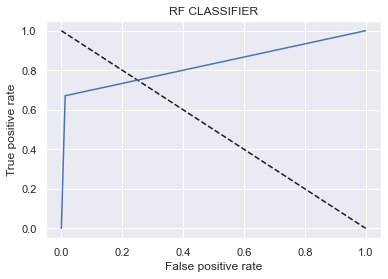

In [62]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

In [64]:
!pip install eli5
import eli5
eli5.show_weights(RF,vec = tf_vec, top = 15)  #random forest classifier
# will give you top 15 features or words  which makes a comment toxic

  Using cached graphviz-0.17-py3-none-any.whl (18 kB)


Weight,Feature
0.0721 ± 0.0518,fuck
0.0401 ± 0.0423,fucking
0.0297 ± 0.0329,shit
0.0199 ± 0.0121,idiot
0.0199 ± 0.0168,suck
0.0184 ± 0.0135,stupid
0.0168 ± 0.0181,bitch
0.0161 ± 0.0151,asshole
0.0119 ± 0.0119,dick
0.0114 ± 0.0111,faggot


In [65]:
test_data =tf_vec.fit_transform(test['comment_text']) #test data (comments) converted to vectors
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [66]:
prediction=RF.predict(test_data)
prediction

array([0, 0, 0, ..., 0, 0, 0])